In [2]:
from vpython import *
import numpy as np
import math
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>

## RC Circuit

In [3]:
scene = canvas()
t = 0
R = 100e3
C = 1e-9
deltat = R*C #Time Constant = R*C
print("deltat: " + str(deltat))
w = 1000
V_i = 5
I_vi = 0
I_eq = 0
V_a = V_i
V_b = V_i - R*I_vi
x = [V_a,V_b,I_vi]
A = [[-(1/R),(1/R),1],[(1/R),-(1/R) - (C/deltat),0],[1,0,0]]
b = [0,I_eq,V_i]
x = np.array(x)
A = np.array(A)
b = np.array(b)
print("x: " + str(x))
print("A: " + str(A))
print("b: " + str(b))
graph_Vin = graph(title='Input Voltage')
graph_input = gcurve(graph=graph_Vin,color=color.red)
# graph_Vout = graph(title='Output Voltage')
graph_output = gcurve(graph=graph_Vin,color=color.blue)
while t < 10e-3:
    rate(100)
    V_i = 5*math.sin(w*t)
    I_eq = -(C/deltat)*V_b
    b = [0,I_eq,V_i]
    x = np.linalg.solve(A,b)
    V_a = x[0]
    #V_b = V_o
    V_b = x[1]
    I_vi = x[2]
    graph_input.plot(t,V_i)
    graph_output.plot(t,V_b)
    t = t + deltat  

<IPython.core.display.Javascript object>

deltat: 0.0001
x: [5. 5. 0.]
A: [[-1.e-05  1.e-05  1.e+00]
 [ 1.e-05 -2.e-05  0.e+00]
 [ 1.e+00  0.e+00  0.e+00]]
b: [0 0 5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

I chose the resistance and capacitance that was used in the lecture notes because they seemed very reasonable for an RC circuit and were very easy to analyze the RC circuit with. I used the time constant R*C for a time step and a simulation length of 3e-3 because that would represent at least one full sinusoidal cycle. I also used an amplitude voltage of 5V and a frequency of 1000Hz to confirm my simulation with an ltspice simulation I created. 

## References

https://www.electronics-tutorials.ws/rc/rc_1.html

## Bode Plot 

In [39]:
def freq(frequency):
    t = 0
    R = 100e3
    C = 1e-9
    deltat = R*C
    w = 1000
    V_i = 5
    I_vi = 0
    I_eq = 0
    V_a = V_i
    V_b = V_i - R*I_vi
    x = [V_a,V_b,I_vi]
    A = [[-(1/R),(1/R),1],[(1/R),-(1/R) - (C/deltat),0],[1,0,0]]
    b = [0,I_eq,V_i]
    x = np.array(x)
    A = np.array(A)
    b = np.array(b)
    max_vin = 0
    max_vout = 0
    min_vin = 999999
    min_vout = 999999
    while t < 10e-3:
        rate(100)
        V_i = 5*math.sin(frequency*t)
        I_eq = -(C/deltat)*V_b
        b = [0,I_eq,V_i]
        x = np.linalg.solve(A,b)
        V_a = x[0]
        #V_b = V_o
        V_b = x[1]
        I_vi = x[2]
        if V_i > max_vin:
            max_vin = V_i
        if V_b > max_vout:
            max_vout = V_b
        if V_i < min_vin:
            min_vin = V_i
        if V_b < min_vout:
            min_vout = V_b
        t = t + deltat
    gain = 20*math.log10((max_vout - min_vout)/(max_vin - min_vin))
    return gain

<IPython.core.display.Javascript object>

gain: 33.958288908847116
gain: 13.836872363878319
gain: -0.6586773780787497
gain: -0.08598712976166491
gain: -3.208388825449572
gain: -7.471911237736004
gain: -1.9072581616608506
gain: -3.0980357156701577
gain: -7.566307262215883


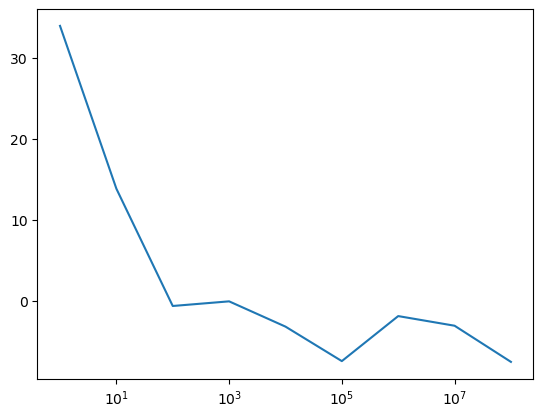

In [40]:
scene=canvas()
cycles = 9
count = 0
frequencies = [1,10,100,1000,10e3,100e3,1e6,10e6,100e6]
gains = []
plt.figure()
while count < cycles:
    gain = freq(frequencies[count])
    gains.append(gain)
    print("gain: " + str(gain))
    count += 1
# g = np.logspace(start=min(gains),stop=max(gains),num=len(gains))
g = np.array(gains)
freq = np.array(frequencies)
plt.semilogx(freq,g)

## Half Wave Rectifier

In [30]:
scene=canvas()
t = 0
R = 100e3
C = 1e-9
deltat = R*C #Time Constant = R*C
original_dt = deltat
print("deltat: " + str(deltat))
w = 1000
n = 1
V_t = 26e-3
V_i = 5 #what is V_i?
I_vi = 0
V_a = V_i
V_b = V_i - R*I_vi
V_o = 0
V_d = .7
I_s = 1e-12
V_d_next = 0
G_deq = (I_s/(n*V_t))*math.exp((V_d/(n*V_t)))
I_d = I_s*(math.exp((V_d/n*V_t))- 1)
I_ceq = -(C/deltat)*V_b
I_deq = I_d - G_deq*V_d
x = [V_a,V_b,I_vi]
A = [[-G_deq,G_deq,1],[G_deq,-G_deq-(C/deltat)-(1/R),0],[1,0,0]]
b = [I_deq,I_ceq - I_deq,V_i]
x = np.array(x)
A = np.array(A)
b = np.array(b)
converge = False
num_cycles = 0
graph_Vin = graph(title='Voltage')
graph_input = gcurve(graph=graph_Vin,color=color.red)
graph_output = gcurve(graph=graph_Vin,color=color.blue)
while t < 10e-3:
    rate(100)
    #update input
    V_i = 5*math.sin(w*t)
    #update values for diode linear component model
    I_d = I_s*(math.exp((V_d/n*V_t))- 1)
    G_deq = (I_s/(n*V_t))*math.exp((V_d/(n*V_t)))
    I_deq = I_d - G_deq*V_d
    b = [I_deq,I_ceq - I_deq,V_i]
    x = np.linalg.solve(A,b)
    V_a = x[0]
    V_b = x[1]
    I_vi = x[2]
    #calculate next state diode voltage
    V_d_next = V_a - V_b
    if V_a > V_d:
        V_b = x[1]
    else:
        V_b = 0
    if abs(V_d - V_d_next) > .001:
        #try again with new V_d
        V_d = V_d_next
        converge = False
    else:
        converge = True
        convergence_dt = deltat
        deltat = original_dt
    if converge == False and num_cycles > 10:
        #decrease time step
        deltat = deltat/2
        #error out if time step gets too small?
    if converge == True or V_b == 0:
        #update capacitor component model
        I_ceq = -(C/convergence_dt)*V_b
        graph_input.plot(t,V_i)
        graph_output.plot(t,V_b)
        num_cycles += 1 #?????
        #increment time
        t = t + convergence_dt
        
    

<IPython.core.display.Javascript object>

deltat: 0.0001


I used the same resistance, capacitance, and time step from the RC circuit simulation because I already knew how the RC circuit would perform and they were all reasonable values. I chose a longer simulation time so you can really see how the half-wave rectifier should perform and I chose all reasonable diode values from my resources and my knowledge of diodes and a half-wave rectifier. 

Changing the resistance doesn't affect the output of the circuit however it does take longer to converge. Changing the capacitance or the time step resulted in a less smooth sinusoidal output for my circuit. 

A time step of R*C resulted in convergence,whereas, a time step of R*C*100 did not. This proves that the smaller time steps are able to converge which makes sense since we are not jumping over important points in the graph, whereas, a larger time step may be jumping over certain points in the graph resulting in it never converging. 

## References

https://lastminuteengineers.com/the-half-wave-rectifier/